In [ ]:
!pip install torch==1.13.1

In [ ]:
print(torch.__version__)

2.0.0+cu118


In [1]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install pytorch-lightning==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 27.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 16.7 MB/s eta 0:00:0

In [2]:
import pandas as pd

In [3]:
import torch
from transformers import AutoConfig, AutoTokenizer, AutoModel, pipeline
from transformers import logging as hflogging


# HF name of the selected pre-trained language model (PLM):
plm_name = 'bert-base-cased'

# If you want to know the exact python class of the model, use the following 2 lines:
# obj = pipeline(model=plm_name)
# type(obj.model)

# But to download and instantiate the model, we will use the generic Auto* classes, so 
# that we don't have to change the code when we select another model with a different 
# transformer class.

# Load the config, the tokenizer and the model itself:
lmconfig = AutoConfig.from_pretrained(plm_name)
lmtokenizer = AutoTokenizer.from_pretrained(plm_name)
lm = AutoModel.from_pretrained(plm_name, output_attentions=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
print("Model max input size:", lmconfig.max_position_embeddings)
print("Model embeddings size:", lmconfig.hidden_size)
print("Model number of hidden layers (encoder blocks):", lmconfig.num_hidden_layers)
print("Model vocab size:", lmconfig.vocab_size)

Model max input size: 512
Model embeddings size: 768
Model number of hidden layers (encoder blocks): 12
Model vocab size: 28996


In [5]:
df_test = pd.read_csv('traindata.csv', sep='\t', header = None)

In [6]:
df_test

,0,1,2,3,4
0,positive,AMBIENCE#GENERAL,seating,18:25,short and sweet – seating is great:it's romant...
1,positive,AMBIENCE#GENERAL,trattoria,25:34,This quaint and romantic trattoria is at the t...
2,positive,FOOD#QUALITY,food,98:102,The have over 100 different beers to offer thi...
3,negative,SERVICE#GENERAL,STAFF,5:10,THIS STAFF SHOULD BE FIRED.
4,positive,FOOD#STYLE_OPTIONS,menu,4:8,"The menu looked great, and the waiter was very..."
...,...,...,...,...,...
1498,positive,DRINKS#QUALITY,expresso,29:37,One of us actually liked the expresso - that's...
1499,negative,SERVICE#GENERAL,waitress,20:28,The hostess and the waitress were incredibly r...
1500,positive,RESTAURANT#PRICES,place,12:17,this little place has a cute interior decor an...
1501,positive,RESTAURANT#GENERAL,restaurant,30:40,Nice Family owned traditional restaurant.


In [ ]:
texts = list(df_test[4])
texts

In [8]:
print(len(texts))
print(len(set(texts)))

1503
1063


In [9]:
for text in texts[:5]:
    tokens = lmtokenizer.tokenize(text, add_special_tokens=True)
    print(tokens)

['[CLS]', 'short', 'and', 'sweet', '–', 'seating', 'is', 'great', ':', 'it', "'", 's', 'romantic', ',', 'co', '##zy', 'and', 'private', '.', '[SEP]']
['[CLS]', 'This', 'q', '##ua', '##int', 'and', 'romantic', 't', '##rat', '##toria', 'is', 'at', 'the', 'top', 'of', 'my', 'Manhattan', 'restaurant', 'list', '.', '[SEP]']
['[CLS]', 'The', 'have', 'over', '100', 'different', 'beers', 'to', 'offer', 'th', '##ier', 'guest', 'so', 'that', 'made', 'my', 'husband', 'very', 'happy', 'and', 'the', 'food', 'was', 'delicious', ',', 'if', 'I', 'must', 'recommend', 'a', 'dish', 'it', 'must', 'be', 'the', 'pu', '##m', '##kin', 'to', '##rte', '##lini', '.', '[SEP]']
['[CLS]', 'T', '##H', '##IS', 'ST', '##AF', '##F', 'SH', '##O', '##U', '##LD', 'B', '##E', 'F', '##IR', '##ED', '.', '[SEP]']
['[CLS]', 'The', 'menu', 'looked', 'great', ',', 'and', 'the', 'waiter', 'was', 'very', 'nice', ',', 'but', 'when', 'the', 'food', 'came', ',', 'it', 'was', 'average', '.', '[SEP]']


In [10]:
# get model's vocabulary (a dict mapping tokens to indices)
vocab = lmtokenizer.get_vocab()
# What's the size of the vocab?
print("Vocab size:", len(vocab))
# is the word "cashed" in the vocab? (False!)
print("'cashed' in the vocab?", "cashed" in vocab)
# is the word "cash" in the vocab? (True!)
print("'cash' in the vocab?", "cash" in vocab)

Vocab size: 28996
'cashed' in the vocab? False
'cash' in the vocab? True


In [11]:
# Reverse the vocab so that we can access tokens from their indices:
idx2token = {idx: token for (token, idx) in vocab.items()}
# Token at index 0 is the [PAD] symbol
print("==> At index 0:", idx2token[0])
# Tokens from index 1 to 100 not used
print("==> At index 99:", idx2token[99])
# First tokens from index 100 up are mostly special symbols and single characters
print("==> Indices 100 to 150:", [idx2token[idx] for idx in range(100,150)])
# First english word seems to be "the" and is at index 1103:
print("==> Indices 1100 to 1200:", [idx2token[idx] for idx in range(1100, 1200)])

==> At index 0: [PAD]
==> At index 99: [unused99]
==> Indices 100 to 150: ['[UNK]', '[CLS]', '[SEP]', '[MASK]', '[unused100]', '[unused101]', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
==> Indices 1100 to 1200: ['－', '／', '：', 'the', 'of', 'and', 'to', 'in', 'was', 'The', 'is', 'for', 'as', 'on', 'with', 'that', '##s', 'his', 'by', 'he', 'at', 'from', 'it', 'her', 'He', 'had', 'an', 'were', 'you', 'be', 'In', 'she', 'are', 'but', 'which', 'It', 'not', 'or', 'have', 'my', 'him', 'one', 'this', 'me', 'has', 'also', 'up', 'their', 'first', 'out', 'who', 'been', 'they', 'She', 'into', 'all', 'would', 'its', '##ing', 'time', 'two', '##a', '##e', 'said', 'about', 'when', 'over', 'more', 'other', 'can', 'after', 'back', 'them', 'then', '##ed', 'there', 'like', 'so', 'only', '##n', 'could', '##d', '##i', '##y', 'what', 

In [ ]:
from pprint import pprint

encoded_texts = lmtokenizer(texts, 
    truncation=True,
    add_special_tokens=True,
    padding=False,
    return_tensors=None,
    return_attention_mask=False,
    return_offsets_mapping=False,
    return_token_type_ids=False,
)

pprint(encoded_texts, width=150)

In [ ]:
encoded_texts = lmtokenizer(texts, 
    truncation=True,
    add_special_tokens=False,
    padding=True,
    return_tensors='pt',
    return_attention_mask=True,
    return_offsets_mapping=False,
    return_token_type_ids=False,
)

encoded_texts

In [14]:
# Put the model in inference mode
lm.eval()

# Feed the encoded texts (`input_ids` and `attention_mask`) into the language model
with torch.no_grad():
    output = lm(**encoded_texts)
    # retrieve the hidden states of the last encoder layer: these are 
    # the contextual embeddings of the input text tokens
    token_embeddings = output.last_hidden_state

token_embeddings.shape

torch.Size([1503, 94, 768])

In [ ]:

global_embedings = token_embeddings.mean(dim=1)
print("First 5 values in each text vector:")
for text, vect in zip(texts, global_embedings):
    print(vect[:5], text)
global_embedings.shape

In [ ]:
# computing embedding vector for a whole text from the embeddings of its tokens, excluding
# the padding tokens. The token_embeddings argument is a tensor (N, seq_len, emb_dim) 
# containing the token embeddings of the texts in a batch; and attention_mask is
# a tensor (N, seq_len) containing the attention mask values for the token sequences.


# Method 1: mean pooling that discards padding tokens
def pool_mean_embeddings(token_embeddings, attention_mask):
    # we reshape the mask to add a 3rd dimension (corresponding to the embedding dim) and 
    # we expand it by duplicating its binary values along that dimension. We obtain
    # a (N, seq_len, emb_dim) tensor (similar to the token embeddings shape)  
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    # we multiply the token embeddings and the expanded mask (element-wise) to set
    # to zero all the embedding values corresponding to padding positions; and then
    # we sum the modified embeddings along dim 1 (time dimension of the token sequences).
    # padding positions are excluded from this sum because their values were set to
    # zero by the element-wise multiplication with the expanded mask.
    # resulting shape = (N, emb_dim) 
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, dim=1)
    # we also sum the expanded mask values along the time dimension: we obtain counts
    # of non-padding tokens for each sequence in the batch, shape=(N, emb_dim)
    sum_mask = input_mask_expanded.sum(dim=1)
    # we will divide the sum_embeddings by the sum_mask (aka. counts of non padding tokens)
    # to get the mean embeddings. In order to avoid division by zero (which might happen, 
    # in theory, when there is an empty token sequence that contains only padding 
    # tokens), we first clamp the sum_mask with a very small non-zero value
    sum_mask = torch.clamp(sum_mask, min=1e-9) 
    # divide the sum_embeddings by the sum_mask to get the mean embeddings
    mean_embeddings = sum_embeddings / sum_mask
    # shape = (N, emb_dim)
    return mean_embeddings


# Method 2: max pooling that ignores padding positions
def pool_max_embeddings(token_embeddings, attention_mask):
    # assign a very large value to all padding positions in the mask, and assign 0 otherwise
    # and then expand the mask, duplicating the values along an additional 3rd dim
    # resulting shape: (N, seq_len, emb_dim)
    input_mask_expanded = torch.where(attention_mask==0, 1e9, 0.).unsqueeze(-1).expand(token_embeddings.size()).float()
    # substract the modified mask values from the token embeddings and take the max
    # along the time dim. Since padding positions have very large values, the 
    # corresponding positions in the substraction result will be very small (large 
    # negative values) and hence will be discarded by the max function
    maxpooled_embeddings = torch.max(token_embeddings-input_mask_expanded, dim=1)[0] 
    return maxpooled_embeddings


global_embedings = pool_mean_embeddings(token_embeddings, encoded_texts['attention_mask'])

print("First 5 values in each text vector:")
for text, vect in zip(texts, global_embedings):
    print(vect[:5], text)



In [17]:
from transformers import TrainingArguments, Trainer
import evaluate
import numpy as np


class TransformerBinaryClassifier(torch.nn.Module):

    def __init__(self, plm_name: str):
        super(TransformerBinaryClassifier, self).__init__()
        self.lmconfig = AutoConfig.from_pretrained(plm_name)
        self.lmtokenizer = AutoTokenizer.from_pretrained(plm_name)
        self.lm = AutoModel.from_pretrained(plm_name, output_attentions=False)
        self.emb_dim = self.lmconfig.hidden_size
        self.output_size = 1
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.2),
            torch.nn.Linear(self.emb_dim, self.output_size),
            torch.nn.Sigmoid()
        )
        self.loss_fn = torch.nn.BCELoss(reduction='mean')


    def forward(self, x):
        x : torch.Tensor = self.lm(x['input_ids'], x['attention_mask']).last_hidden_state
        global_vects = x.mean(dim=1)
        x = self.classifier(global_vects)
        return x.squeeze(-1)
    
    def compute_loss(self, predictions, target):
        return self.loss_fn(predictions, target)


model = TransformerBinaryClassifier(plm_name)



Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
df_train = pd.read_csv('traindata.csv', sep='\t', header = None)
df_test = pd.read_csv('devdata.csv', sep='\t', header = None)

In [19]:
list_labels = []
for i in range(len(df_train[0])):
  if df_train[0].iloc[i] == "positive":
    list_labels.append(1)
  else:
    list_labels.append(0)
df_train["labels"] = list_labels

In [20]:
list_labels_test = []
for i in range(len(df_test[0])):
  if df_test[0].iloc[i] == "positive":
    list_labels_test.append(1)
  else:
    list_labels_test.append(0)
df_test["labels"] = list_labels_test

In [21]:
df_test.head()

,0,1,2,3,4,labels
0,positive,LOCATION#GENERAL,neighborhood,54:66,"great food, great wine list, great service in ...",1
1,negative,RESTAURANT#GENERAL,place,15:20,I thought this place was totally overrated.,0
2,positive,FOOD#QUALITY,Fish,0:4,Fish is so very fresh.,1
3,negative,SERVICE#GENERAL,manager,19:26,"I showed it to the manager, and he smilingly a...",0
4,neutral,DRINKS#QUALITY,margaritas,63:73,"The food we ordered was excellent, although I ...",0


In [22]:
df_train = df_train.rename(columns={0:"polarity", 1:"aspect", 2:"word", 3:"span", 4:"text"})
df_test = df_test.rename(columns={0:"polarity", 1:"aspect", 2:"word", 3:"span", 4:"text"})

In [23]:
print(df_train.head())
print(df_test.head())

   polarity              aspect       word    span  \
0  positive    AMBIENCE#GENERAL    seating   18:25   
1  positive    AMBIENCE#GENERAL  trattoria   25:34   
2  positive        FOOD#QUALITY       food  98:102   
3  negative     SERVICE#GENERAL      STAFF    5:10   
4  positive  FOOD#STYLE_OPTIONS       menu     4:8   

                                                text  labels  
0  short and sweet – seating is great:it's romant...       1  
1  This quaint and romantic trattoria is at the t...       1  
2  The have over 100 different beers to offer thi...       1  
3                        THIS STAFF SHOULD BE FIRED.       0  
4  The menu looked great, and the waiter was very...       1  
   polarity              aspect          word   span  \
0  positive    LOCATION#GENERAL  neighborhood  54:66   
1  negative  RESTAURANT#GENERAL         place  15:20   
2  positive        FOOD#QUALITY          Fish    0:4   
3  negative     SERVICE#GENERAL       manager  19:26   
4   neutral      

In [24]:
from datasets import Dataset
ds_train = Dataset.from_pandas(df_train[["labels", "text"]])
ds_test = Dataset.from_pandas(df_test[["labels", "text"]])

In [25]:
def tokenize_function(examples):
    return model.lmtokenizer(examples["text"], truncation=True)


# ds_train = ds_train.rename_column("label", "labels")
# ds_test = ds_test.rename_column("label", "labels")

# tokenize datasets
tok_ds_train = ds_train.map(tokenize_function, batched=True)
tok_ds_test = ds_test.map(tokenize_function, batched=True)

tok_ds_train = tok_ds_train.remove_columns(["text"])
tok_ds_test = tok_ds_test.remove_columns(["text"])


Map:   0%|          | 0/1503 [00:00<?, ? examples/s]

Map:   0%|          | 0/376 [00:00<?, ? examples/s]

In [26]:
tok_ds_train

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1503
})

In [27]:
X_train_encoded = model.lmtokenizer(list(df_train["text"]),
                            truncation=True,
                            padding=False,
                            add_special_tokens=False,
                            return_tensors=None,
                            return_offsets_mapping=False,
                        )

X_test_encoded = model.lmtokenizer(list(df_test["text"]),
                            truncation=True,
                            padding=False,
                            add_special_tokens=False,
                            return_tensors=None,
                            return_offsets_mapping=False,
                        )

In [28]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

data_collator = DataCollatorWithPadding(tokenizer=model.lmtokenizer, padding=True, return_tensors='pt')

train_dataloader = DataLoader(tok_ds_train, shuffle=True, batch_size=8, collate_fn=data_collator)
eval_dataloader = DataLoader(tok_ds_test, batch_size=8, collate_fn=data_collator)

# just for testing
for b in train_dataloader:
    print(b['labels'])
    break

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


tensor([1, 1, 1, 1, 1, 1, 1, 1])


In [29]:
from torch.optim import AdamW
from transformers import get_scheduler

optimizer = AdamW(model.parameters(), lr=5e-5)


num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

# device = 'cpu'

model.to(device)

lr_scheduler

cuda


In [30]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        predictions = model(batch)
        loss = model.loss_fn(predictions, batch['labels'].float())
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

        

  0%|          | 0/564 [00:00<?, ?it/s]

In [31]:

def predict(model, texts):
  model.eval()
  encoded_texts = model.lmtokenizer(texts, truncation=True, padding=True, return_attention_mask=True, return_tensors='pt')
  with torch.no_grad():
    output = model(encoded_texts.to(device)).tolist()
    pred_labels = ["positive" if p>0.5 else "negative" for p in output]
    return list(zip(texts, pred_labels))


In [32]:
predictions = predict(model, list(df_test["text"]))

In [33]:
text, label = predictions[0]
print(label)

positive


In [34]:
y_pred = []
for i in range(len(df_test["text"])):
  text, label = predictions[i]
  if label == df_test["polarity"].iloc[i]:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [35]:
print(np.sum(y_pred))
print(len(y_pred))
print(np.sum(y_pred)/len(y_pred))

304
376
0.8085106382978723


In [36]:
for i in range(len(df_test["text"])):
  text, label = predictions[i]
  if label == df_test["polarity"].iloc[i]:
    pass
  else:
    print(df_test["polarity"].iloc[i])
    print(label)
    print(df_test["word"].iloc[i])
    print(df_test["text"].iloc[i])

negative
positive
manager
I showed it to the manager, and he smilingly apologized and brought us two free desserts (but did not ask us what we wanted and so brought the last two desserts we would have asked for).
neutral
negative
margaritas
The food we ordered was excellent, although I wouldn't say the margaritas were anything to write home about.
negative
positive
salt encrusted shrimp appetizer
I believe there were 2 shrimp in the "salt encrusted shrimp" appetizer. 
positive
negative
food
The food we ordered was excellent, although I wouldn't say the margaritas were anything to write home about.
positive
negative
Service
Service was very prompt but slightly rushed.
positive
negative
wine list
The wine list was extensive - though the staff did not seem knowledgeable about wine pairings.
positive
negative
pasta
The pasta was well cooked, didn't have enough sauce though or flavor.
positive
negative
food
The food and service were fine, however the maitre-D was incredibly unwelcoming and 

In [ ]:
# load libraries commonly used in machine learning
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Number of sequences')

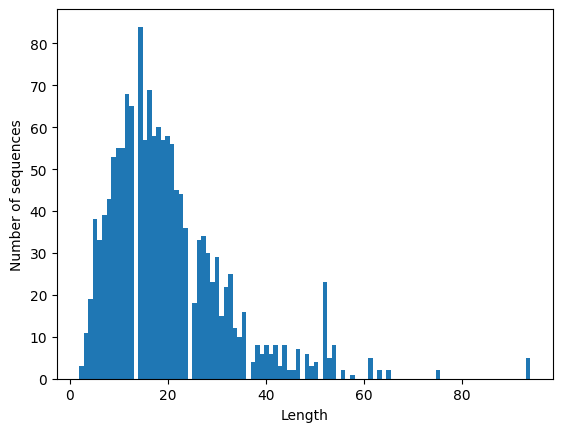

In [ ]:
_ = plt.hist([len(text_ids) for text_ids in X_train_encoded['input_ids']], 100)
plt.xlabel("Length")
plt.ylabel("Number of sequences")

In [ ]:
from typing import List

import torch


class Classifier:
    """
    The Classifier: complete the definition of this class template by providing a constructor (i.e. the
    __init__() function) and the 2 methods train() and predict() below. Please donot change
     """



    ############################################# comp
    def train(self, train_filename: str, dev_filename: str, device: torch.device):
        """
        Trains the classifier model on the training set stored in file trainfile
        PLEASE:
          - DO NOT CHANGE THE SIGNATURE OF THIS METHOD
          - PUT THE MODEL and DATA on the specified device! Do not use another device
          - DO NOT USE THE DEV DATA AS TRAINING EXAMPLES, YOU CAN USE THEM ONLY FOR THE OPTIMIZATION
         OF MODEL HYPERPARAMETERS
        """


    def predict(self, data_filename: str, device: torch.device) -> List[str]:
        """Predicts class labels for the input instances in file 'datafile'
        Returns the list of predicted labels
        PLEASE:
          - DO NOT CHANGE THE SIGNATURE OF THIS METHOD
          - PUT THE MODEL and DATA on the specified device! Do not use another device
        """

In [ ]:
from transformers import TrainingArguments, Trainer
import evaluate
import numpy as np


class TransformerBinaryClassifier(torch.nn.Module):

    def __init__(self, plm_name: str):
        super(TransformerBinaryClassifier, self).__init__()
        self.lmconfig = AutoConfig.from_pretrained(plm_name)
        self.lmtokenizer = AutoTokenizer.from_pretrained(plm_name)
        self.lm = AutoModel.from_pretrained(plm_name, output_attentions=False)
        self.emb_dim = self.lmconfig.hidden_size
        self.output_size = 1
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.2),
            torch.nn.Linear(self.emb_dim, self.output_size),
            torch.nn.Sigmoid()
        )
        self.loss_fn = torch.nn.BCELoss(reduction='mean')


    def forward(self, x):
        x : torch.Tensor = self.lm(x['input_ids'], x['attention_mask']).last_hidden_state
        global_vects = x.mean(dim=1)
        x = self.classifier(global_vects)
        return x.squeeze(-1)
    
    def compute_loss(self, predictions, target):
        return self.loss_fn(predictions, target)


model = TransformerBinaryClassifier(plm_name)

